## Decision Tree iris 다중 분류(Multiclass Classification)
---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import my_utils as my

In [ ]:
# 경고 문구 알림 끄기
# import warnings
# warnings.filterwarnings("ignore")

#### 데이터 준비

In [5]:
x_train, x_test, y_train, y_test = my.get_iris()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [6]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [7]:
from sklearn.tree import DecisionTreeClassifier

# DT는 꼭 정규화를 안해도 됨

clf = DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

1.0

#### GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    "min_samples_leaf": range(1, 10),
    "max_depth": range(3, 10),
    "min_samples_split": range(3, 10)
}

clf = DecisionTreeClassifier(random_state=1)
gs = GridSearchCV(clf, params, cv=3, verbose=3)
gs.fit(x_train, y_train)

Fitting 3 folds for each of 441 candidates, totalling 1323 fits
[CV 1/3] END max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=0.975 total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=0.925 total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.975 total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.900 total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.925 total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.975 total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.900 total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.925 total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=1,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(3, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(3, 10)},
             verbose=3)

In [12]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [13]:
gs.best_score_

0.9333333333333332

In [14]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=3, random_state=1)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=1)

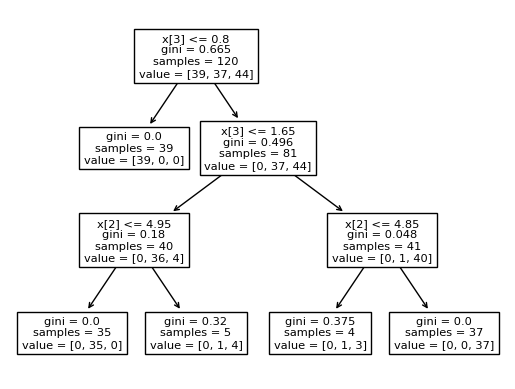

In [17]:
from sklearn.tree import plot_tree

plot_tree(clf)
plt.show()